# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**1. Загрузить датасет**

In [2]:
data = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\3 Python и математика для анализа данных\\3.16 Кейс-стади\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [11]:
data.info()
# отсутсвующих значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [26]:
cl = data.groupby('Class').count().reset_index()

<BarContainer object of 2 artists>

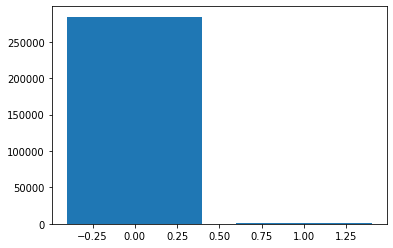

In [25]:
plt.bar(cl['Class'], cl['Amount'])

In [31]:
data[data['Class'] == 1]['Class'].count(), data[data['Class'] == 0]['Class'].count()
# мошеннический 492, четсных 284315

(492, 284315)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [32]:
am = data.groupby('Class')['Amount'].sum().reset_index()
am

,Class,Amount
0,0,2.510246e+07
1,1,6.012797e+04


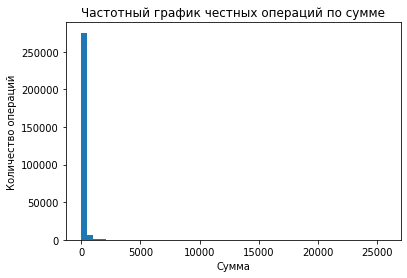

In [40]:
am0 = data[data['Class'] == 0]['Amount']
plt.hist(am0, 50)
plt.xlabel('Сумма')
plt.ylabel('Количество операций')
plt.title('Частотный график честных операций по сумме')
plt.show()

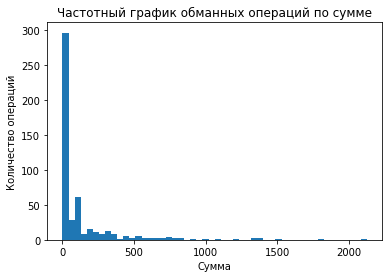

In [41]:
am1 = data[data['Class'] == 1]['Amount']
plt.hist(am1, 50)
plt.xlabel('Сумма')
plt.ylabel('Количество операций')
plt.title('Частотный график обманных операций по сумме')
plt.show()

**5. Построить графики histograms для всех значений**

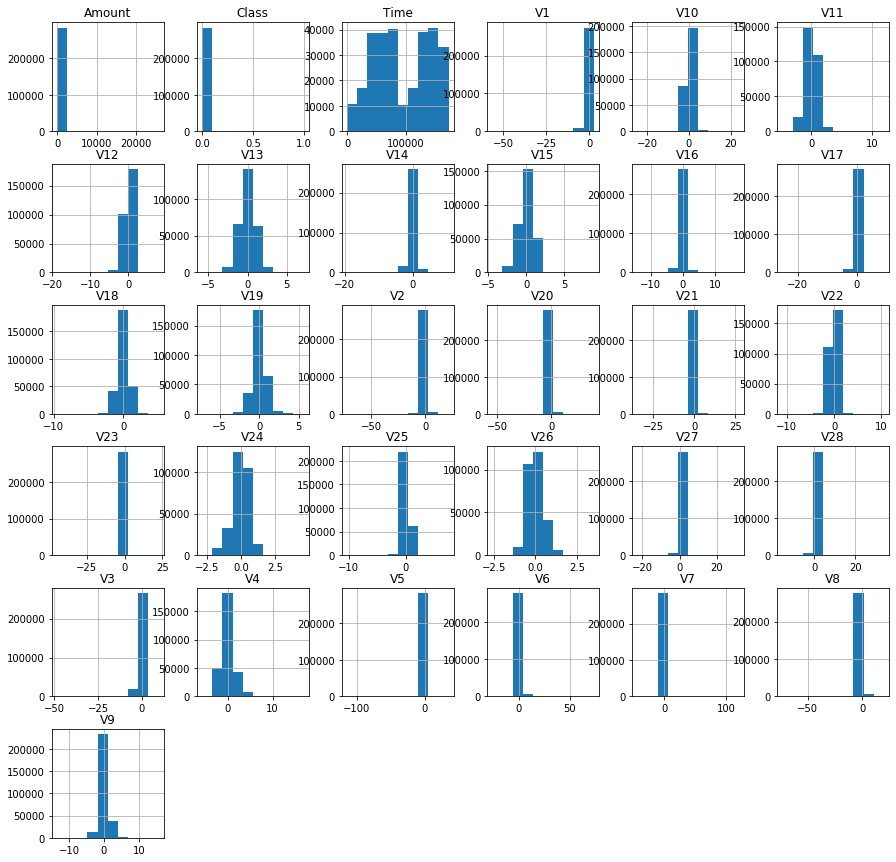

In [43]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [3]:
# так как столбцов больше 30, то разобьем таблицу на 2, чтобы все умещалось
data2 = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'Class']]
data2.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Class
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,-0.101347
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,0.091289
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,-0.192961
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,0.133447
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-0.094974
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-0.043643
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,-0.187257
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,0.019875
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-16,-1.588105e-15,-0.097733
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,2.624448e-16,1.439907e-15,-8.853582e-16,2.622513e-16,7.615272e-16,-0.216883


In [4]:
data3 = data[['V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount', 'Class']]
data3.corr()

,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
V16,1.000000e+00,1.854297e-15,-3.015119e-15,1.041659e-15,3.903456e-16,-3.927401e-16,3.878384e-17,8.519670e-16,-4.289239e-16,-6.644104e-16,-5.186503e-16,7.820038e-16,8.637186e-16,0.011903,-0.003910,-0.196539
V17,1.854297e-15,1.000000e+00,-5.584714e-15,-3.916791e-16,-9.887431e-16,-7.753967e-16,-8.389703e-16,5.367784e-16,-5.543631e-17,4.822068e-16,4.870302e-16,8.844373e-16,-2.182692e-16,-0.073297,0.007309,-0.326481
V18,-3.015119e-15,-5.584714e-15,1.000000e+00,-2.424185e-15,-4.942764e-16,-1.140973e-15,-8.662635e-17,-3.624236e-16,-1.126043e-16,-2.310856e-16,3.183964e-16,2.435170e-16,8.844995e-16,0.090438,0.035650,-0.111485
V19,1.041659e-15,-3.916791e-16,-2.424185e-15,1.000000e+00,2.938450e-16,4.032541e-16,-9.690436e-16,5.733798e-16,3.126716e-17,7.415355e-16,5.614354e-16,-1.113035e-16,-1.375843e-15,0.028975,-0.056151,0.034783
V20,3.903456e-16,-9.887431e-16,-4.942764e-16,2.938450e-16,1.000000e+00,-1.120828e-15,1.105842e-15,4.986739e-16,1.637488e-16,-1.518242e-16,-2.975081e-16,-1.446069e-15,-1.133579e-16,-0.050866,0.339403,0.020090
V21,-3.927401e-16,-7.753967e-16,-1.140973e-15,4.032541e-16,-1.120828e-15,1.000000e+00,3.905948e-15,6.127323e-16,1.298254e-16,-2.826293e-16,-4.907301e-16,-1.033403e-15,5.132234e-16,0.044736,0.105999,0.040413
V22,3.878384e-17,-8.389703e-16,-8.662635e-17,-9.690436e-16,1.105842e-15,3.905948e-15,1.000000e+00,3.130812e-16,1.150829e-17,-6.078986e-16,-8.477050e-16,-1.294910e-16,-3.021376e-16,0.144059,-0.064801,0.000805
V23,8.519670e-16,5.367784e-16,-3.624236e-16,5.733798e-16,4.986739e-16,6.127323e-16,3.130812e-16,1.000000e+00,-4.411271e-17,-9.938362e-16,8.848700e-16,5.524044e-16,9.029821e-16,0.051142,-0.112633,-0.002685
V24,-4.289239e-16,-5.543631e-17,-1.126043e-16,3.126716e-17,1.637488e-16,1.298254e-16,1.150829e-17,-4.411271e-17,1.000000e+00,1.557318e-15,3.129195e-16,-3.736529e-16,-2.259275e-16,-0.016182,0.005146,-0.007221
V25,-6.644104e-16,4.822068e-16,-2.310856e-16,7.415355e-16,-1.518242e-16,-2.826293e-16,-6.078986e-16,-9.938362e-16,1.557318e-15,1.000000e+00,2.810884e-15,-6.107118e-16,3.399375e-16,-0.233083,-0.047837,0.003308


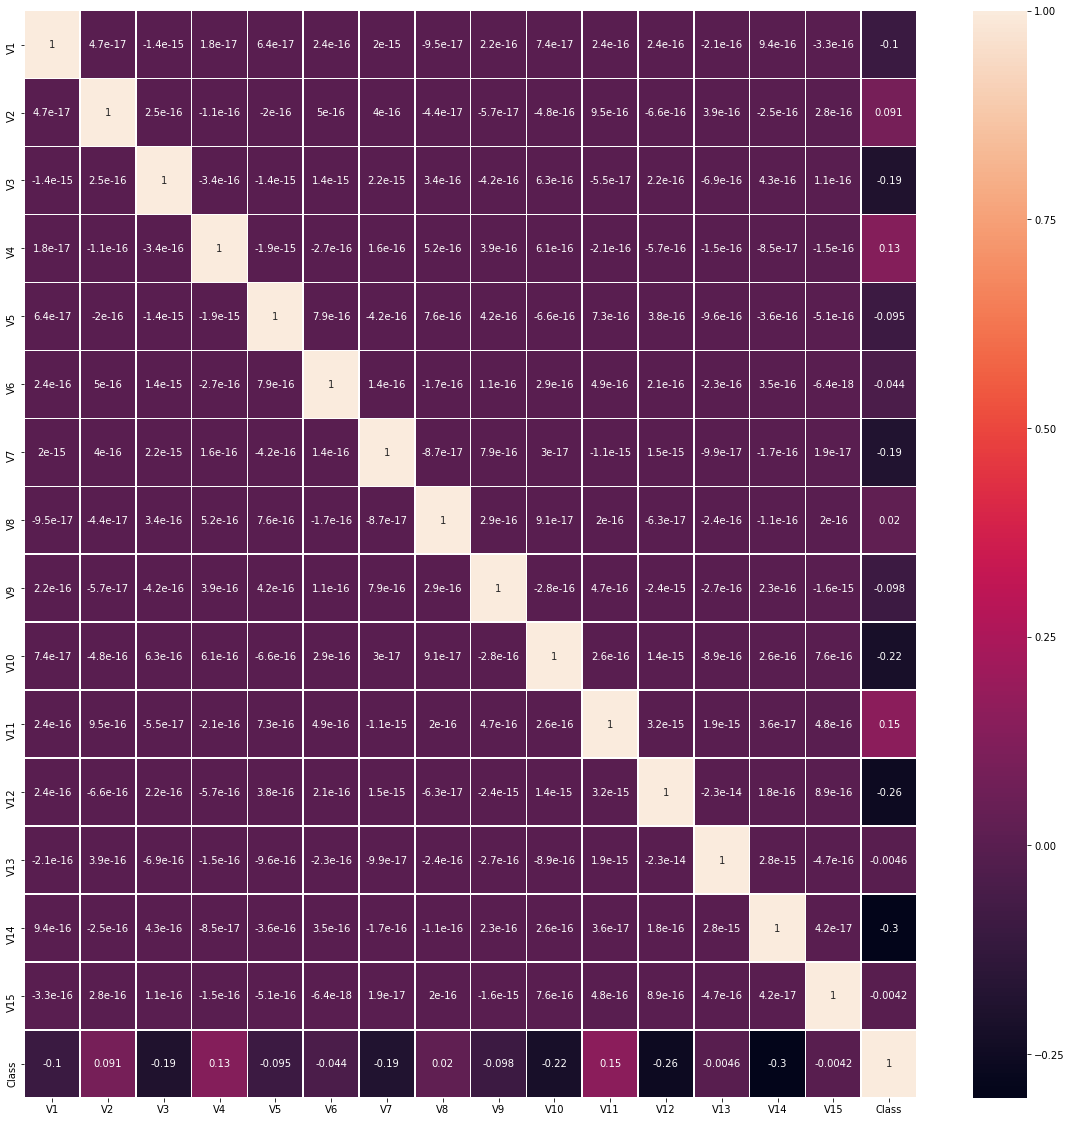

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data2.corr(), annot = True, linewidths=.5, ax=ax)

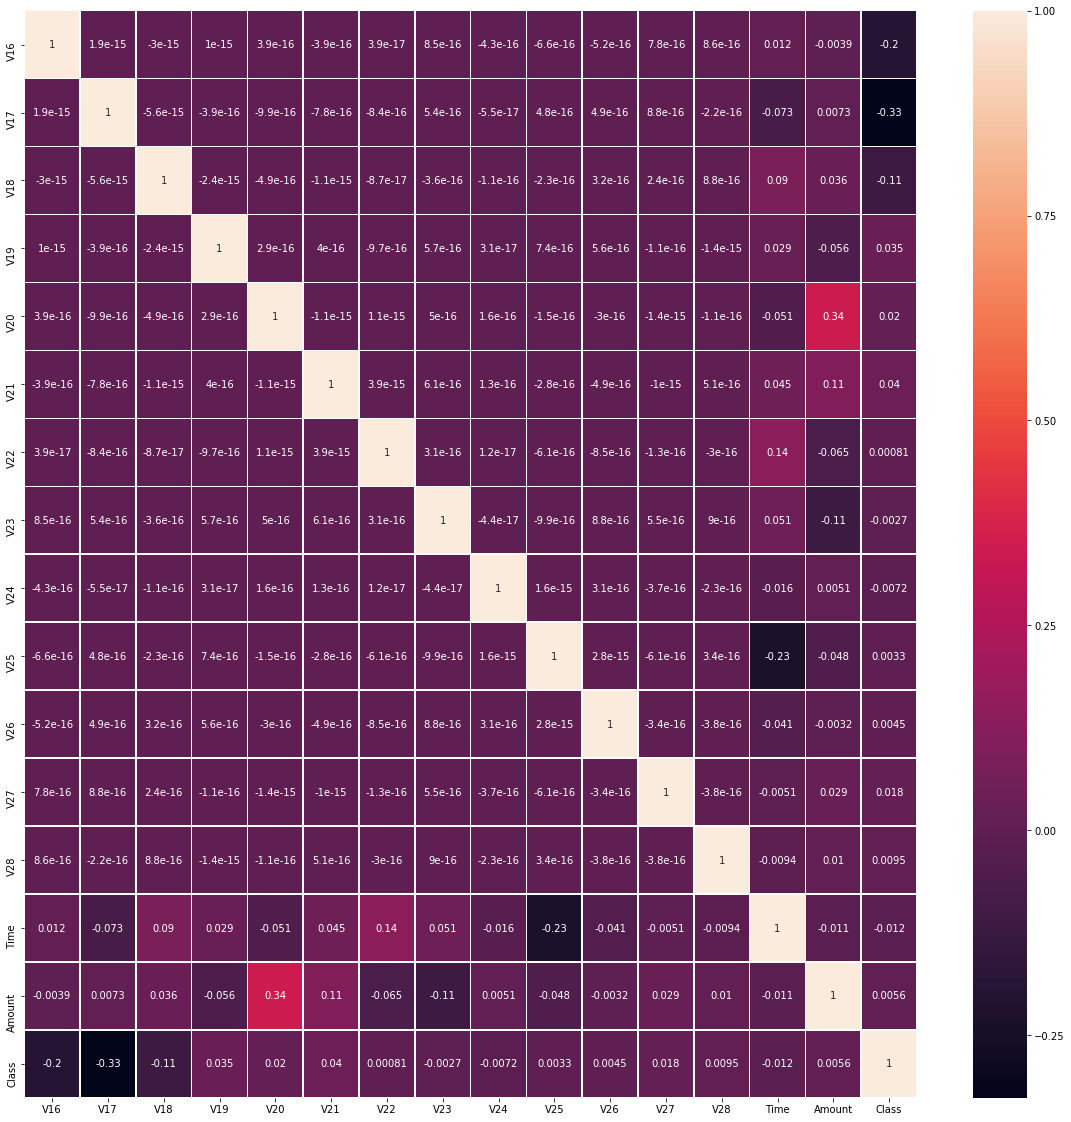

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data3.corr(), annot = True, linewidths=.5, ax=ax)

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [6]:
# для предсказания значения Class выберем элементы: V17, V14 и V12 тк они имеют наибольшую корреляцию с Class и при этом
# не коррелируют между собой
from sklearn.linear_model import LinearRegression
V12 = data['V12']
V14 = data['V14']
V17 = data['V17']
class_ = data['Class']
x = np.vstack([np.array(V12), np.array(V14), np.array(V17)]).T # Объединение массивов
y = np.array(class_)
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.0017274856306200301
slope: [-0.01083034 -0.01310645 -0.01596285]


In [7]:
# предсказание для первых трех значений в таблице
print('Предсказание модели: ', model.predict(x[0:3]))
# в таблице первые 3 значения = 0, полученные моделью практически равны 0

Предсказание модели:  [ 0.00917699 -0.00609242 -0.01453154]


In [53]:
# теперь с разделением на тренировочные и тестовые данные
from sklearn.model_selection import train_test_split
# наибольшая корреляция у V17 - используем её
X_train, X_test, y_train, y_test = train_test_split(data.V17, data.Class, test_size = 0.2, random_state = 0)
model = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)
# округляем до целого т.к. результирующий столбец из 0 и 1
y_model = np.round(model.predict(np.array(X_test).reshape(-1,1)), 0)
# сортируем по классу = 1 т.к. его очень мало по отношению к классу 0
test = pd.DataFrame({"V17" : X_test, "fact" : y_test, "model" : y_model}).sort_values("fact", ascending=False)
test.head(10)
# уже видно, что модель не работает

,V17,fact,model
142557,-0.566390,1,0.0
10897,-12.602596,1,0.0
6903,-2.760097,1,0.0
94218,-8.760786,1,0.0
223572,-5.709087,1,0.0
143728,-9.338938,1,0.0
252774,-1.558545,1,0.0
124087,4.152086,1,-0.0
151011,-17.270985,1,0.0
124115,-0.370333,1,0.0


In [55]:
# верно определенные честные сделки - высокая точность
true0_0 = test[(test['fact'] == 0) & (test['model'] == 0)]
100. * len(true0_0) / len(test)

99.82268881008392

In [56]:
# верно определенные мошеннические сделки - вообще не определяет!
true1_1 = test[(test['fact'] == 1) & (test['model'] == 1)]
100. * len(true1_1) / len(test)

0.0

In [57]:
# неверно определенные честные сделки - таких нет
false0_1 = test[(test['fact'] == 0) & (test['model'] == 1)]
100. * len(false0_1) / len(test)

0.0

In [58]:
# неверно определенные мошеннические сделки - слишком большая ошибка для такой задачи
false1_0 = test[(test['fact'] == 1) & (test['model'] == 0)]
100. * len(false1_0) / len(test)
# как вывод можно сказать, что модель не работает т.к. не определяет мошеннические операции

0.1773111899160844

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [70]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
data2 = normal.sample(n=len(fraud)).append(fraud)
X_train, X_test, y_train, y_test = train_test_split(data2.V17, data2.Class, test_size = 0.2, random_state = 0)
model = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)
y_model = np.round(model.predict(np.array(X_test).reshape(-1,1)), 0)
test2 = pd.DataFrame({"V17" : X_test, "fact" : y_test, "model" : y_model}).sort_values("fact", ascending=False)
test2.head(10)
# на первый взгляд результаты уже лучше

,V17,fact,model
203700,0.462929,1,0.0
76929,-4.377106,1,1.0
214662,-5.856998,1,1.0
40085,3.902825,1,0.0
102446,-6.248145,1,1.0
233258,-4.815863,1,1.0
238222,-9.285186,1,1.0
223618,-4.368986,1,1.0
163149,-9.567268,1,1.0
6108,-12.598419,1,1.0


In [71]:
# верно определенные честные сделки - меьше половины
true0_0 = test2[(test2['fact'] == 0) & (test2['model'] == 0)]
100. * len(true0_0) / len(test2)

46.192893401015226

In [72]:
# верно определенные мошеннические сделки - всего треть
true1_1 = test2[(test2['fact'] == 1) & (test2['model'] == 1)]
100. * len(true1_1) / len(test2)

30.456852791878173

In [73]:
# неверно определенные честные сделки - таких нет
false0_1 = test2[(test2['fact'] == 0) & (test2['model'] == 1)]
100. * len(false0_1) / len(test2)

0.0

In [74]:
# неверно определенные мошеннические сделки - четверть
false1_0 = test2[(test2['fact'] == 1) & (test2['model'] == 0)]
100. * len(false1_0) / len(test2)
#  в качестве вывода можно сказать, что после уравнивания по количеству элементов точность выросла, но для такой сферы
# точность остается слишком низкой. данную модель также отнес бы к нерабочим

23.3502538071066

**9. Посчитать модель RandomForestClassifier и сравнить результаты с логистической регрессией.** Почему результаты получились лучше или хуже? Тренировочные и тестовые данные аналогичны п. 7

In [95]:
# разбиваю класс на 2 столбца
data_modified = data

In [84]:
def normal(a):
    if a == 0:
        return 1
    return 0

In [91]:
def fraud(a):
    if a == 1:
        return 1
    return 0

In [92]:
data_modified['normal'] = data_modified['Class'].apply(normal)
data_modified['fraud'] = data_modified['Class'].apply(fraud)

In [94]:
data_modified['normal'].sum(), data_modified['fraud'].sum()
# проверка сумм, все сошлось

(284315, 492)

In [111]:
input_x = data_modified.iloc[:,:30]
output_y = data_modified.iloc[:,31:]

In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

normal    284315
fraud        492
dtype: int64


In [101]:
from sklearn.model_selection import train_test_split
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(input_x, Y, test_size=0.2)

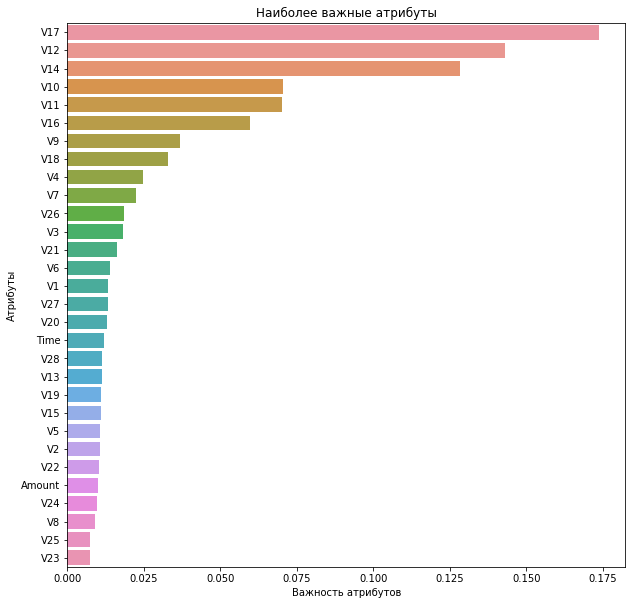

In [102]:
from sklearn.ensemble import RandomForestClassifier
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train_30,y_train_30)
headers = list(X_train_30.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [103]:
model.score(X_test_30, y_test_30)
# точность почти 100%, скорее всего, тут та же история как п.7 из-за несбалансированности классов

0.999403110845827

In [107]:
# теперь посчитаем со сбалансированными классами, как в п. 8
normal3 = data_modified[data_modified['normal'] == 1]
fraud3 = data_modified[data_modified['fraud'] == 1]
data3 = normal3.sample(n=len(fraud3)).append(fraud3)

In [112]:
input3_x = data3.iloc[:,:30]
output3_y = data3.iloc[:,31:]

In [114]:
le3=LabelEncoder()
targets3=(output3_y.iloc[:,:]==1).idxmax(1)
print(targets3.value_counts())
Y3=le.fit_transform(targets)

fraud     492
normal    492
dtype: int64


In [116]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(input3_x, Y3, test_size=0.2)

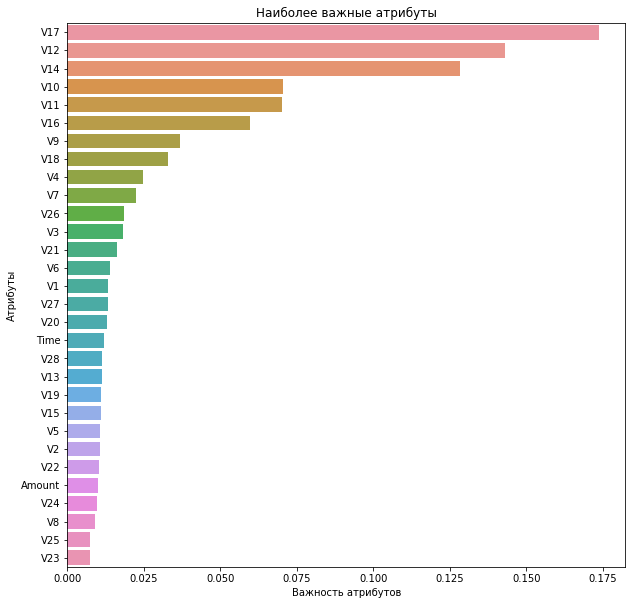

In [117]:
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train_30,y_train_30)
headers3 = list(X_train_30.columns.values)
feature_imp3 = pd.Series(model3.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [118]:
model3.score(X_test_30, y_test_30)
# больше похоже на правду. у этого метода точность выше, чем у линейной регрессии за счет того, что обучаем модель 
# по всем 30-ти входным параметрам

0.9187817258883249